<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_multivariate_analysis.ipynb#scrollTo=WfzIAI-J6TEO">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_multivariate_analysis.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Dimensionality Reduction 
[Principal components analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) is a technique applied to multispectral and hyperspectral remotely sensed data. PCA transforms an original correlated dataset into a substantially smaller set of uncorrelated variables that represents most of the information present in the original dataset. It reduces data dimensionality (e.g., number of bands). Instead of throwing away the redundant data, principal components analysis condenses the information in intercorrelated variables into a few variables, called principal components.




### Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
To install multiple packages at the same time, you define a vector that contains the names of the packages to be installed.

The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-10) package defines classes and methods for spatial raster data access and manipulation. 
[RStoolbox](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6) is an package providing a wide range of tools for your every-day remote sensing processing needs. The available tool-set covers many aspects for remote sensing image processing and analysis such as calculating spectral indices, principal component transformation, unsupervised and supervised classification or fractional cover analyses.

In [ ]:
packages <- c("raster", "RStoolbox")
install.packages(packages)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
Using the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we simultaneously apply the `library()` function to all elements of the vector containing the packages.



In [ ]:
lapply(packages , library, character.only = TRUE)

Set the current working directory of the R process with the [setwd](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/getwd) function.

In [4]:
setwd("/content")

## Study area
Let's analyze Landsat images of the [*Parakanã Indigenous Reserve*](https://pib.socioambiental.org/en/Povo:Parakan%C3%A3) in the state of Pará, a northern region of Brazil. This reserve, founded in 1975, is listed as an indigenous area but has not been assigned to an International Union for Conservation of Nature (IUCN) category (Protected Planet, http://www.protectedplanet.net). 

Large-scale deforestation in the region is due to agricultural expansion and cattle ranching and has modified this region considerably in the past. Mainly, the Parakanã Indigenous Reserve remains forested. A reservoir on the Rio Tocantins (Tocantins River) covers the north-east part of the area. This large body of water (Lago Tucuruí) is an artificial lake created by the construction of a hydroelectric dam called Represa de Tucuruí (Tucuruí Dam) which was finished in 1984. Construction of the dam is closely related to the observed deforestation and degradation patterns, as workers began settling down after the construction of the dam was complete. Moreover the area is bisected by the Transamazônica highway. 

Download Landsat images of the Parakanã Indigenous Reserve from this [link]() to get the data to use in this example.

![](https://media.gettyimages.com/photos/large-deforestation-surrounds-the-parakana-indigenous-reserve-in-the-picture-id959485258)


## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function.
Select the images already pre-processed for the year 2011. Explore the properties of the `p224r63_2011` object.

Also there may be multiple functions with the same name in multiple packages. The colon operator allows you to specify the specific function you want: `package::functionname`



In [7]:
p224r63_2011 <- raster::brick("p224r63_2011_masked.grd")
p224r63_2011

class      : RasterBrick 
dimensions : 1499, 2967, 4447533, 7  (nrow, ncol, ncell, nlayers)
resolution : 30, 30  (x, y)
extent     : 579765, 668775, -522705, -477735  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=22 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : p224r63_2011_masked.grd 
names      :       B1_sre,       B2_sre,       B3_sre,       B4_sre,       B5_sre,        B6_bt,       B7_sre 
min values : 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.196277e-02, 4.116526e-03, 2.951000e+02, 0.000000e+00 
max values :    0.1249041,    0.2563655,    0.2591587,    0.5592193,    0.4894984,  305.2000000,    0.3692634 


### Lansat bands
$\mathsf{B1}$ = Blue; 
$\mathsf{B2}$ = Green;
$\mathsf{B3}$ = Red;
$\mathsf{B4}$ = Near Infrared;
$\mathsf{B5}$ = Short Wave Infrared;
$\mathsf{B6}$ = Thermal Infrared;
$\mathsf{B7}$ = Short Wave Infrared.

## Multicollinearity
The spectral bands of an image have some degree of correlation with each other.
Excessive correlation between two or more bands results in a
greater redundancy of overall information.
This feature, called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) or collinearity, can be useful for eliminating unnecessary information to view images. In this way you get a good compromise between size and quality of an image.

It is possible to visualize the degree of correlation between each pair of bands through different scatter plots. We can either manually build the individual graphs like this:
```
plot(p224r63_2011$B1_sre, p224r63_2011$B2_sre, col="red", pch=19, cex=2)
                                     .
                                     .
                                     .
plot(p224r63_2011$B6_sre, p224r63_2011$B5_sre, col="red", pch=19, cex=2)
```
Otherwise, we can use the [pairs](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/pairs) function to automatically produce a scatterplot matrix with the respective correlation coefficients.


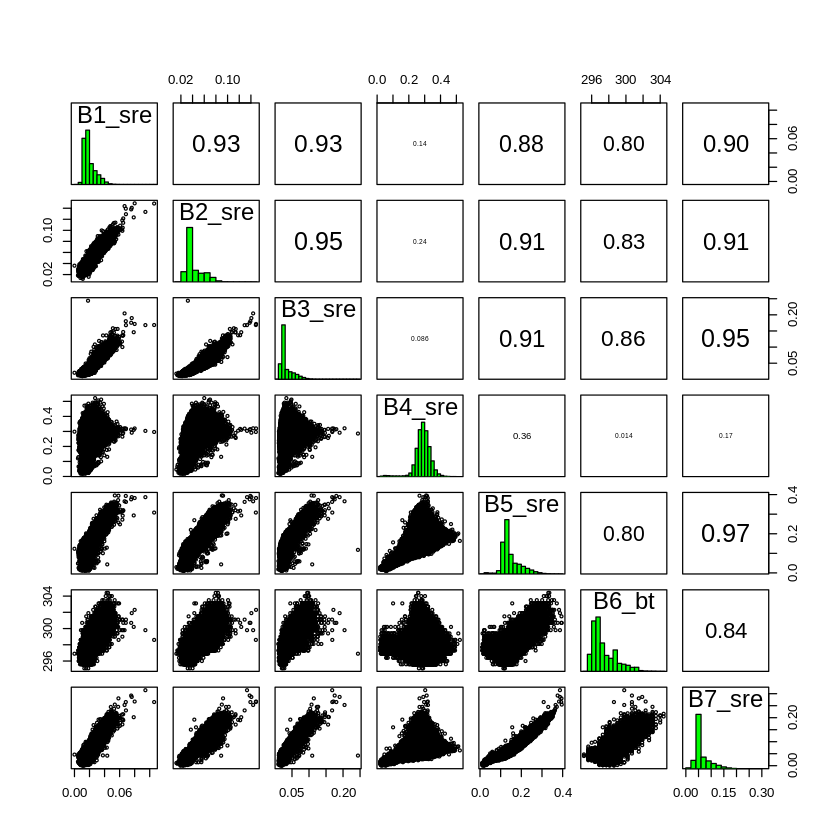

In [8]:
pairs(p224r63_2011)

## Principal Component Analysis

In [17]:
p224r63_2011_pca <- RStoolbox::rasterPCA(p224r63_2011)

In [18]:
summary(p224r63_2011_pca$model)

Importance of components:
                          Comp.1      Comp.2       Comp.3       Comp.4
Standard deviation     1.3225113 0.051860776 0.0262682561 6.721165e-03
Proportion of Variance 0.9980273 0.001534693 0.0003937369 2.577702e-05
Cumulative Proportion  0.9980273 0.999561964 0.9999557012 9.999815e-01
                             Comp.5       Comp.6       Comp.7
Standard deviation     4.356758e-03 2.743519e-03 2.439490e-03
Proportion of Variance 1.083105e-05 4.294963e-06 3.395797e-06
Cumulative Proportion  9.999923e-01 9.999966e-01 1.000000e+00

### Image resampling
*Resampling* is the mathematical technique used to create a new version of the image with a different width and/or height in pixels. Increasing the size of an image is called *upsampling*; reducing its size is called *downsampling*.

The image size reduction occurs through the [aggregate](https://www.rdocumentation.org/packages/raster/versions/3.4-10/topics/aggregate) function of the `raster` package which groups the initial pixels in order to create larger cells.
In the function, the `fact` argument is the aggregation factor expressed as the number of cells in each direction (e.g. the new cell will be equal to 10 X 10 pixels).

The spatial resolution changes from 30 $\mathsf{m}$ to 300 $\mathsf{m}$ while the number of pixels is reduced by two orders of magnitude (in this case from 4447533 to 44550).

In [10]:
p224r63_2011_res <- aggregate(p224r63_2011, fun=mean, fact=10)
p224r63_2011_res

Use the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function to compare the different spatial resolution between the initial image and the resampled one.

Export the image using the [pdf](https://www.rdocumentation.org/packages/grDevices/versions/3.6.2/topics/pdf) function to enlarge it better and view the differences.

N.B. always use the `dev.off()` function to manage the correct closing and loading of the graphics space.

In [ ]:
pdf(file = '/content/downsampling.pdf')
par(mfrow=c(2,1))
plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="lin")
plotRGB(p224r63_2011_res, r=4, g=3, b=2, stretch="lin")
dev.off()

In [ ]:
p224r63_2011_res_pca <- RStoolbox::rasterPCA(p224r63_2011)

In [ ]:
pdf(file = '/content/ImagePCA_res.pdf')
plotRGB(p224r63_2011_pca$map, r=1, g=2, b=3, stretch="lin")
dev.off()